In [59]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [2]:
# warnings.filterwarnings('ignore')

In [41]:
train=pd.read_csv("../data/train.csv",low_memory=False,parse_dates=[2])
print(train.shape)
train.head()

(1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [10]:
train.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [42]:
test=pd.read_csv("../data/test.csv",parse_dates=[2])
print(test.shape)
test.head()

(41088, 8)


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [15]:
test.dtypes

Id                 int64
Store              int64
DayOfWeek         object
Date              object
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object

In [16]:
store=pd.read_csv("../data/store.csv")
print(store.shape)
store.head()

(1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [17]:
ss = pd.read_csv("../data/sample_submission.csv")
print(ss.shape)
ss.head()

(41088, 2)


,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [18]:
# plot missing values percentage
def missing_perc(df):
    # Check the percentage of missing values in every column
    ax = df.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 7))
    plt.title('Percentage of Missing Values Per Column in Tweets data', fontdict={'size':15})

    for p in ax.patches:
        percentage ='{:,.2f}%'.format((p.get_width()/df.shape[0])*100)
        width, height =p.get_width(),p.get_height()
        x=p.get_x()+width+0.02
        y=p.get_y()+height/2
        ax.annotate(percentage,(x,y))

In [19]:
train.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [20]:
test.isna().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [21]:
store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [22]:
train_df=train.merge(store,how='left',on='Store')

In [23]:
test_df=test.merge(store,how='left',on='Store')

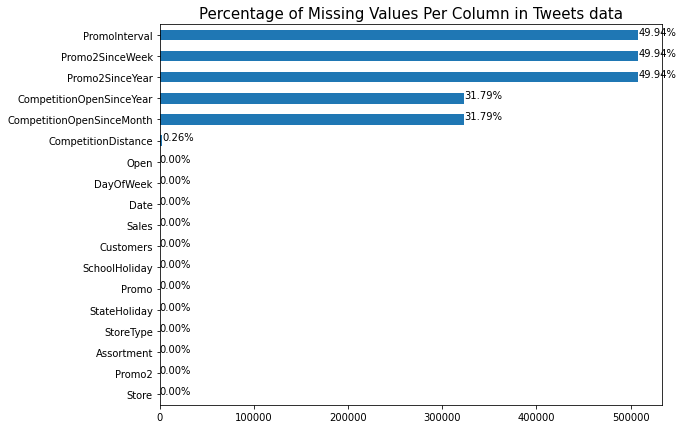

In [24]:
missing_perc(train_df)

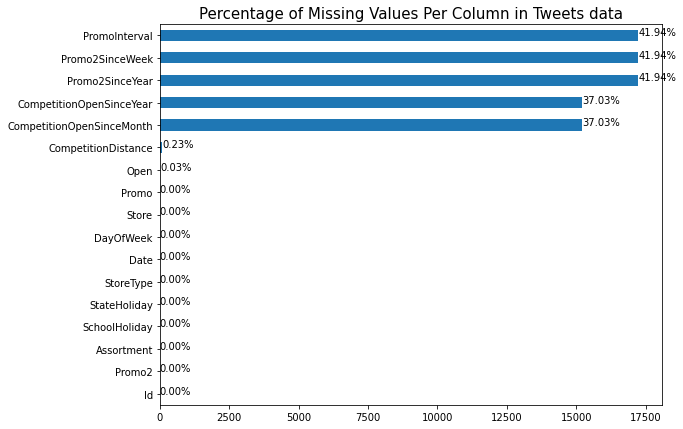

In [25]:
missing_perc(test_df)

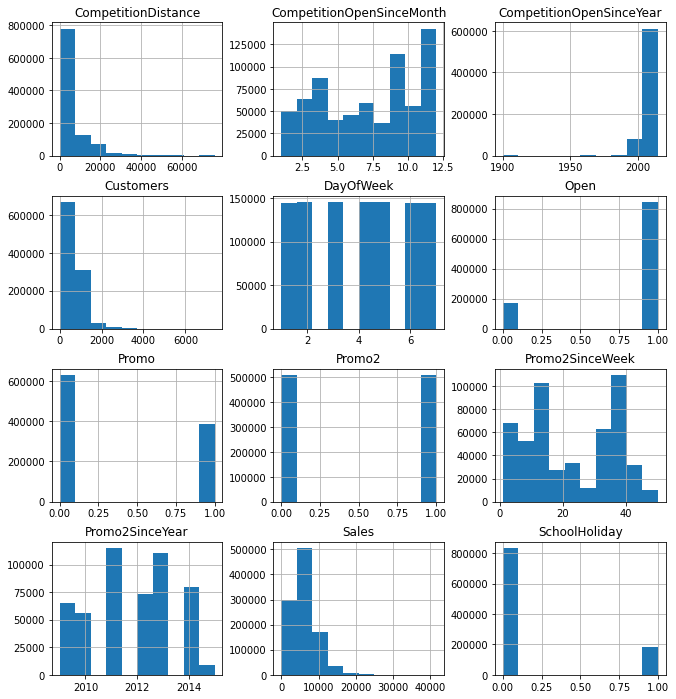

In [26]:
_=train_df[list(train_df.columns.difference(['Store']))].hist(figsize=(11,12))

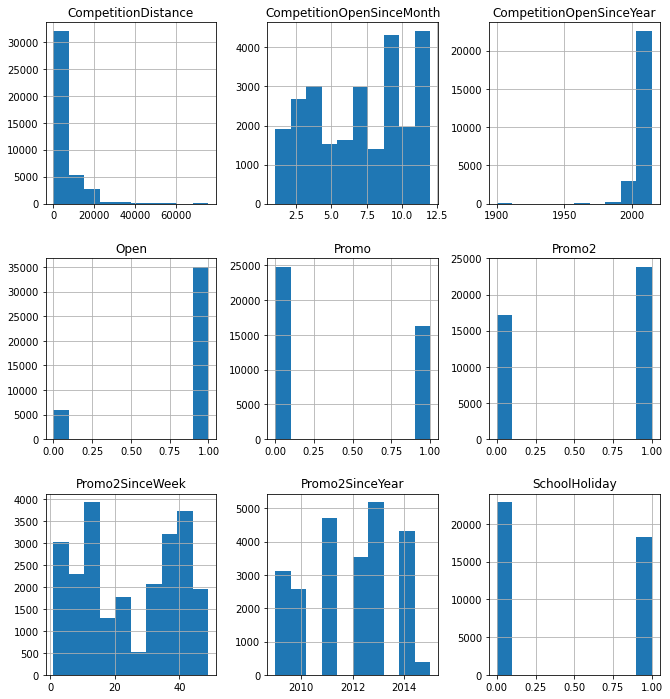

In [27]:
_=test_df[list(test_df.columns.difference(['Id','Store']))].hist(figsize=(11,12))

In [51]:
train_df.replace({'StateHoliday':{'a':'Public Holiday','b':'Easter Holiday','c':'Christmas','0':'None'}},inplace=True)

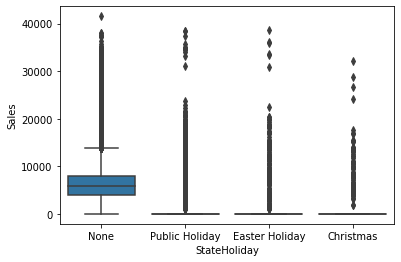

In [52]:
# a = public holiday, b = Easter holiday, c = Christmas, 0 = None
_=sns.boxplot(x='StateHoliday',y='Sales',data=train_df)

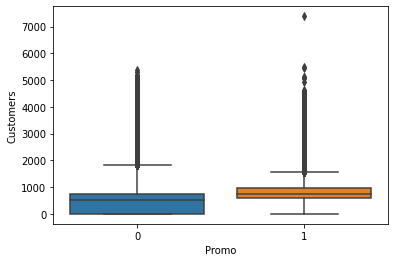

In [53]:
_=sns.boxplot(x='Promo',y='Customers',data=train_df)

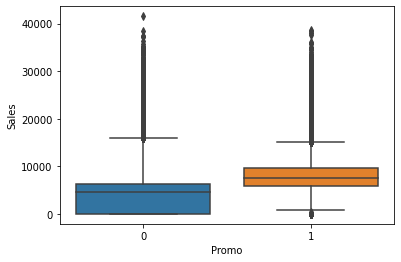

In [54]:
_=sns.boxplot(x='Promo',y='Sales',data=train_df)

In [55]:
mpl.rcParams['agg.path.chunksize'] = 10000

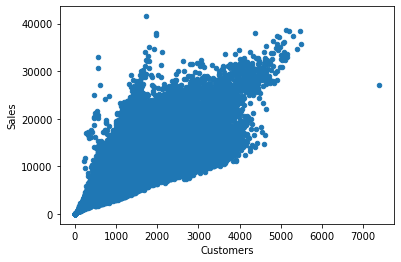

In [56]:
_=train_df.plot(kind='scatter',x='Customers',y='Sales')

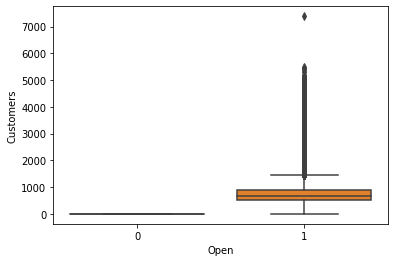

In [57]:
_=sns.boxplot(x='Open',y='Customers',data=train_df)

In [33]:
# train.set_index('Date',inplace=True,drop=True)

In [176]:
# test.set_index('Date',inplace=True,drop=True)
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,None,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,None,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,None,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,None,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,None,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,Public Holiday,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,Public Holiday,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,Public Holiday,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,Public Holiday,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [196]:
train_grouped

,Sales,Customers,StateHoliday
Date,,,
2013-01-01,97235,19491,Public Holiday
2013-01-02,6949829,834075,None
2013-01-03,6347820,761040,None
2013-01-04,6638954,782137,None
2013-01-05,5951593,687472,None
...,...,...,...
2015-07-27,10707292,970462,None
2015-07-28,9115073,876092,None
2015-07-29,8499962,828524,None


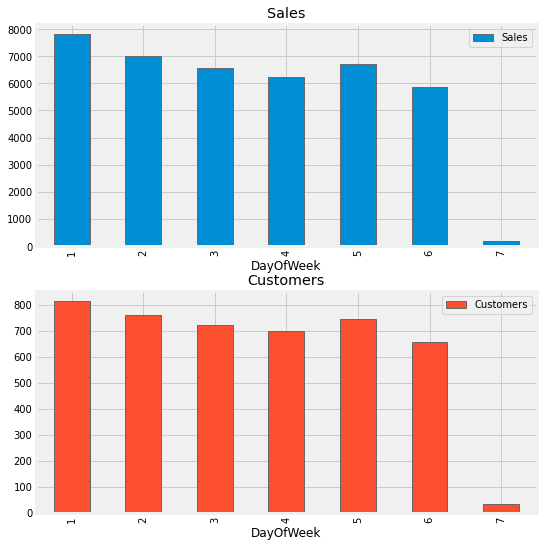

In [91]:
_=train_df.groupby(by='DayOfWeek').agg({'Sales':'mean','Customers':'mean'}).plot(kind='bar',
                                                                                 subplots=True,figsize=(8,9),sharex=False)

In [183]:
train_grouped=train_df.groupby(by='Date').aggregate({'Sales':'sum','Customers':'sum','StateHoliday':'unique'})
# .plot(subplots=True,sharex=False,figsize=(12,8))

In [184]:
train_grouped['StateHoliday']=train_grouped['StateHoliday'].apply(lambda x: x[0])

In [197]:
public_holiday=train_grouped.query("StateHoliday=='Public Holiday'").index
xmas=train_grouped.query("StateHoliday=='Christmas'").index
easter=train_grouped.query("StateHoliday=='Easter Holiday'").index

In [ ]:
#plot lines
def highlight_datetimes(indices, ax):
    i = 0
    while i < len(indices)-1:
        ax.axvspan(df.index[indices[i]], df.index[indices[i] + 1], facecolor='green', edgecolor='none', alpha=.5)
        i += 1

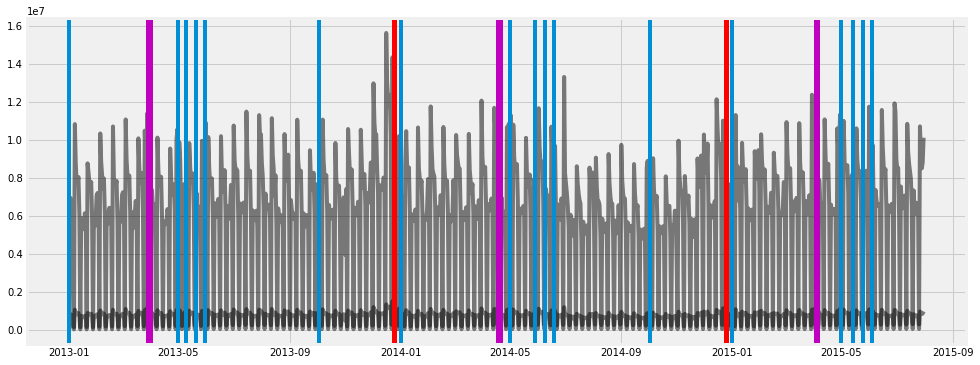

In [232]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True,figsize=(15,6))


for v in train_grouped.columns.difference(['StateHoliday']).tolist():
    axes.plot(train_grouped[v], label=v, color='black', alpha=.5)


#highlight areas
# highlight_datetimes(public_holiday, axes)
for i in public_holiday:
    plt.axvline(i)

for i in easter:
    plt.axvline(i,color='m')

for i in xmas:
    plt.axvline(i,color='r')

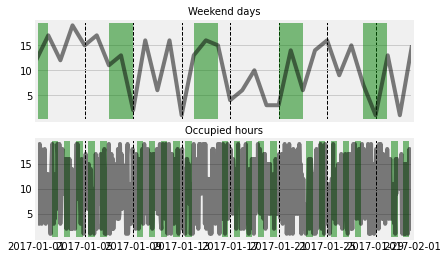

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# dummy data (Days)
dates_d = pd.date_range('2017-01-01', '2017-02-01', freq='D')
df = pd.DataFrame(np.random.randint(1, 20, (dates_d.shape[0], 1)))
df.index = dates_d

# dummy data (Hours)
dates_h = pd.date_range('2017-01-01', '2017-02-01', freq='H')
df_h = pd.DataFrame(np.random.randint(1, 20, (dates_h.shape[0], 1)))
df_h.index = dates_h

#two graphs
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)

#plot lines
dfs = [df, df_h]
for i, df in enumerate(dfs):
    for v in df.columns.tolist():
        axes[i].plot(df[v], label=v, color='black', alpha=.5)

def find_weekend_indices(datetime_array):
    indices = []
    for i in range(len(datetime_array)):
        if datetime_array[i].weekday() >= 5:
            indices.append(i)
    return indices

def find_occupied_hours(datetime_array):
    indices = []
    for i in range(len(datetime_array)):
        if datetime_array[i].weekday() < 5:
            if datetime_array[i].hour >= 7 and datetime_array[i].hour <= 19:
                indices.append(i)
    return indices

def highlight_datetimes(indices, ax):
    i = 0
    while i < len(indices)-1:
        ax.axvspan(df.index[indices[i]], df.index[indices[i] + 1], facecolor='green', edgecolor='none', alpha=.5)
        i += 1

#find to be highlighted areas, see functions
weekend_indices = find_weekend_indices(df.index)
occupied_indices = find_occupied_hours(df_h.index)
#highlight areas
highlight_datetimes(weekend_indices, axes[0])
highlight_datetimes(occupied_indices, axes[1])

#formatting..
axes[0].xaxis.grid(b=True, which='major', color='black', linestyle='--', alpha=1) #add xaxis gridlines
axes[1].xaxis.grid(b=True, which='major', color='black', linestyle='--', alpha=1) #add xaxis gridlines
axes[0].set_xlim(min(dates_d), max(dates_d))
axes[0].set_title('Weekend days', fontsize=10)
axes[1].set_title('Occupied hours', fontsize=10)

plt.show()

In [202]:
weekend_indices

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 334,
 335,
 336,
 337,
 338,
 339,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 350,
 351,
 352,
 353,
 354,
 355,
 356,
 357,
 358,
 359,
 480,
 481,
 482,
 483,
 484,
 485,
 486,
 487,
 488,
 489,
 490,
 491,
 492,
 493,
 494,
 495,
 496,
 497,
 498,
 499,
 500,
 501,
 502,
 503,
 504,
 505,
 506,
 507,
 508,
 509,
 510,
 511,
 512,
 513,
 514,
 515,
 516,
 517,
 518,
 519,
 520,
 521,
 522,
 523,
 524,
 525,
 526,
 527,
 648,
 649,
 650,
 651,
 6

In [103]:
# train_df['DayOfWeek'].value_counts()
# train_df.query("Open==1 &(DayOfWeek==6 or DayOfWeek==7)")